In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns',200)

In [2]:
df = pd.read_excel('World military power.xlsx')

## EDA

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

In [4]:
df.sample(5)

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
74,Mexico,0.6065,Mexico,484.0,Mexico,3.0,Mexico,33.0,Mexico,43.0,Mexico,206.0,Mexico,202.0,Mexico,0.0,Mexico,0.0,Mexico,2199.0,Mexico,0.0,Mexico,265.0,Mexico,0.0,Mexico,189.0,Mexico,0.0,Mexico,0.0,Mexico,0.0,Mexico,4.0,Mexico,"7,00,00,00,000",Mexico,"4,45,80,00,00,000",Mexico,1714.0,Mexico,"19,81,000",Mexico,"20,00,000",Mexico,"7,64,00,00,000",Mexico,"6,04,60,418",Mexico,"12,59,59,205",Mexico,"19,64,375",Mexico,9330.0,Mexico,2900.0,Mexico,4389.0
136,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,Yemen,21.0,Yemen,61.0,Yemen,14.0,Yemen,620.0,Yemen,615.0,Yemen,20.0,Yemen,85.0,Yemen,150.0,Yemen,30.0,Yemen,0.0,Yemen,0.0,Yemen,0.0,Yemen,0.0,Yemen,"1,40,00,00,000",Yemen,"7,06,80,00,000",Yemen,57.0,Yemen,12260.0,Yemen,"1,45,000",Yemen,"3,00,00,00,000",Yemen,"1,12,66,221",Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
118,Switzerland,0.5259,Switzerland,169.0,Switzerland,54.0,Switzerland,0.0,Switzerland,18.0,Switzerland,54.0,Switzerland,42.0,Switzerland,0.0,Switzerland,326.0,Switzerland,1338.0,Switzerland,224.0,Switzerland,0.0,Switzerland,0.0,Switzerland,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,"5,00,00,00,000",Switzerland,"16,64,00,00,00,000",Switzerland,63.0,Switzerland,0.0,Switzerland,"2,60,000",Switzerland,0.0,Switzerland,"36,32,250",Switzerland,"82,92,809",Switzerland,41277.0,NaN,NaN,Switzerland,1299.0,Switzerland,1770.0
59,Jordan,1.1441,Jordan,278.0,Jordan,44.0,Jordan,4.0,Jordan,16.0,Jordan,75.0,Jordan,146.0,Jordan,47.0,Jordan,1313.0,Jordan,2897.0,Jordan,461.0,Jordan,72.0,Jordan,88.0,Jordan,37.0,Jordan,0.0,Jordan,0.0,Jordan,0.0,Jordan,0.0,Jordan,"2,60,00,00,000",Jordan,"29,34,00,00,000",Jordan,18.0,Jordan,22.0,Jordan,"1,10,000",Jordan,"10,00,000",Jordan,"33,46,692",Jordan,"1,04,58,413",Jordan,89342.0,Jordan,26.0,Jordan,540.0,Jordan,1744.0
18,Brazil,0.1988,Brazil,715.0,Brazil,43.0,Brazil,78.0,Brazil,126.0,Brazil,198.0,Brazil,242.0,Brazil,12.0,Brazil,437.0,Brazil,1820.0,Brazil,132.0,Brazil,565.0,Brazil,84.0,Brazil,112.0,Brazil,0.0,Brazil,6.0,Brazil,0.0,Brazil,7.0,Brazil,"27,80,00,00,000",Brazil,"5,47,40,00,00,000",Brazil,4093.0,Brazil,"26,22,000",Brazil,"30,20,000",Brazil,"13,00,00,00,000",Brazil,"10,77,64,996",Brazil,"20,88,46,892",Brazil,"85,14,877",Brazil,7491.0,Brazil,50000.0,Brazil,16145.0


In [5]:
df.columns

Index(['2020 ranking', 'Unnamed: 1', 'Airforce Strength', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Land Strength',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Navy Strength', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Finances', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Logistics', 'Unnamed: 41',
       'Natural resources', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Manpower', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Geography', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59'],
  

In [6]:
df = df.rename(columns = ({"2020 ranking": "Countries",
                     "Unnamed: 1":"Military Strength Power Index",
                     "Unnamed: 3":"Aircraft Strength value",
                     "Unnamed: 5":"Fighter/Interceptor Strength value",
                     "Unnamed: 7":"Attack Aircraft Strength value",
                      "Unnamed: 9":"Transport Aircraft Fleet Strength value",
                      "Unnamed: 11":"Trainer Aircraft Fleet value",
                      "Unnamed: 13":"Helicopter Fleet Strength value",
                      "Unnamed: 15":"Attack Helicopter Fleet Strength value",
                      "Unnamed: 17":"Tank Strength value",
                      "Unnamed: 19":"AFV/APC Strength value",
                      "Unnamed: 21":"Self-Propelled Artillery Strength value",
                      "Unnamed: 23":"Towed Artillery Strength value",
                      "Unnamed: 25":"Rocket Projector Strength value",
                      "Unnamed: 27":"Navy Fleet Strengths value",
                      "Unnamed: 29":"Aircraft Carrier Fleet Strength value",
                      "Unnamed: 31":"Submarine Fleet Strength value",
                      "Unnamed: 33":"Destroyer Fleet Strength value",
                      "Unnamed: 35":"Frigate Fleet Strength value",
                      "Unnamed: 37":"defense spending budget value",
                      "Unnamed: 39":"External Debt value",
                      "Unnamed: 41":"Airport Totals value",
                      "Unnamed: 43":"Oil Production value",
                      "Unnamed: 45":"Oil Consumption value",
                      "Unnamed: 47":"Proven Oil Reserves value",
                      "Unnamed: 49":"Available Manpower value",
                      "Unnamed: 51":"Total Population value",
                      "Unnamed: 53":"Total Square Land Area value",
                      "Unnamed: 55":"Total Coastline Coverage value",
                      "Unnamed: 57":"Total Waterway Coverage value",
                      "Unnamed: 59":"Total Border Coverage value",
                     }))

In [7]:
df.head()

,Countries,Military Strength Power Index,Airforce Strength,Aircraft Strength value,Unnamed: 4,Fighter/Interceptor Strength value,Unnamed: 6,Attack Aircraft Strength value,Unnamed: 8,Transport Aircraft Fleet Strength value,Unnamed: 10,Trainer Aircraft Fleet value,Unnamed: 12,Helicopter Fleet Strength value,Unnamed: 14,Attack Helicopter Fleet Strength value,Land Strength,Tank Strength value,Unnamed: 18,AFV/APC Strength value,Unnamed: 20,Self-Propelled Artillery Strength value,Unnamed: 22,Towed Artillery Strength value,Unnamed: 24,Rocket Projector Strength value,Navy Strength,Navy Fleet Strengths value,Unnamed: 28,Aircraft Carrier Fleet Strength value,Unnamed: 30,Submarine Fleet Strength value,Unnamed: 32,Destroyer Fleet Strength value,Unnamed: 34,Frigate Fleet Strength value,Finances,defense spending budget value,Unnamed: 38,External Debt value,Logistics,Airport Totals value,Natural resources,Oil Production value,Unnamed: 44,Oil Consumption value,Unnamed: 46,Proven Oil Reserves value,Manpower,Available Manpower value,Unnamed: 50,Total Population value,Geography,Total Square Land Area value,Unnamed: 54,Total Coastline Coverage value,Unnamed: 56,Total Waterway Coverage value,Unnamed: 58,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0

In [8]:
df.drop(["Airforce Strength",
        "Unnamed: 4",
        "Unnamed: 6",
        "Unnamed: 8",
        "Unnamed: 10",
        "Unnamed: 12",
        "Unnamed: 14",
        "Land Strength",
        "Unnamed: 18",
        "Unnamed: 20",
        "Unnamed: 22",
        "Unnamed: 24",
        "Navy Strength",
        "Unnamed: 28",
        "Unnamed: 30",
        "Unnamed: 32",
        "Unnamed: 34",
        "Finances",
        "Unnamed: 38",
        "Logistics",
        "Natural resources",
        "Unnamed: 44",
        "Unnamed: 46",
        "Manpower",
        "Unnamed: 50",
        "Geography",
        "Unnamed: 54",
        "Unnamed: 56",
        "Unnamed: 58"],axis = 1, inplace =True
       )

In [9]:
df

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,"4,00,00,000","11,66,00,00,000",88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Countries                                139 non-null    object
 1   Military Strength Power Index            139 non-null    object
 2   Aircraft Strength value                  139 non-null    object
 3   Fighter/Interceptor Strength value       139 non-null    object
 4   Attack Aircraft Strength value           139 non-null    object
 5   Transport Aircraft Fleet Strength value  139 non-null    object
 6   Trainer Aircraft Fleet value             139 non-null    object
 7   Helicopter Fleet Strength value          139 non-null    object
 8   Attack Helicopter Fleet Strength value   139 non-null    object
 9   Tank Strength value                      139 non-null    object
 10  AFV/APC Strength value                   139 non-null    objec

In [11]:
df.fillna("0",inplace =True)

In [12]:
df.isnull().sum()

Countries                                  0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

In [13]:
df

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,"4,00,00,000","11,66,00,00,000",88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0,6043.0


In [14]:
df.index[0]

0

In [15]:
df.drop(df.index[0], inplace=True)

In [16]:
df.describe().T

,count,unique,top,freq
Countries,138,138,Afghanistan,1
Military Strength Power Index,138.0,138.0,1.3444,1.0
Aircraft Strength value,138.0,113.0,19.0,5.0
Fighter/Interceptor Strength value,138.0,63.0,0.0,46.0
Attack Aircraft Strength value,138.0,38.0,0.0,75.0
Transport Aircraft Fleet Strength value,138.0,49.0,0.0,15.0
Trainer Aircraft Fleet value,138.0,77.0,0.0,25.0
Helicopter Fleet Strength value,138.0,97.0,5.0,4.0
Attack Helicopter Fleet Strength value,138.0,45.0,0.0,63.0
Tank Strength value,138.0,106.0,0.0,24.0


In [17]:
df.set_index('Countries', inplace=True)

In [18]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength Power Index            138 non-null    object
 1   Aircraft Strength value                  138 non-null    object
 2   Fighter/Interceptor Strength value       138 non-null    object
 3   Attack Aircraft Strength value           138 non-null    object
 4   Transport Aircraft Fleet Strength value  138 non-null    object
 5   Trainer Aircraft Fleet value             138 non-null    object
 6   Helicopter Fleet Strength value          138 non-null    object
 7   Attack Helicopter Fleet Strength value   138 non-null    object
 8   Tank Strength value                      138 non-null    object
 9   AFV/APC Strength value                   138 non-null    object
 10  Self-Propelled Artillery Strength value  138 non-nul

In [20]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [21]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

In [22]:
df.describe().T

,count,unique,top,freq
military_strength_power_index,138.0,138.0,1.3444,1.0
aircraft_strength_value,138.0,113.0,19.0,5.0
fighter/interceptor_strength_value,138.0,63.0,0.0,46.0
attack_aircraft_strength_value,138.0,38.0,0.0,75.0
transport_aircraft_fleet_strength_value,138.0,49.0,0.0,15.0
trainer_aircraft_fleet_value,138.0,77.0,0.0,25.0
helicopter_fleet_strength_value,138.0,97.0,5.0,4.0
attack_helicopter_fleet_strength_value,138.0,45.0,0.0,63.0
tank_strength_value,138.0,106.0,0.0,24.0
afv/apc_strength_value,138.0,130.0,2000.0,4.0


In [23]:
df.duplicated().value_counts()

False    138
dtype: int64

In [24]:
df.isnull().sum()

military_strength_power_index              0
aircraft_strength_value                    0
fighter/interceptor_strength_value         0
attack_aircraft_strength_value             0
transport_aircraft_fleet_strength_value    0
trainer_aircraft_fleet_value               0
helicopter_fleet_strength_value            0
attack_helicopter_fleet_strength_value     0
tank_strength_value                        0
afv/apc_strength_value                     0
self-propelled_artillery_strength_value    0
towed_artillery_strength_value             0
rocket_projector_strength_value            0
navy_fleet_strengths_value                 0
aircraft_carrier_fleet_strength_value      0
submarine_fleet_strength_value             0
destroyer_fleet_strength_value             0
frigate_fleet_strength_value               0
defense_spending_budget_value              0
external_debt_value                        0
airport_totals_value                       0
oil_production_value                       0
oil_consum

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   military_strength_power_index            138 non-null    object
 1   aircraft_strength_value                  138 non-null    object
 2   fighter/interceptor_strength_value       138 non-null    object
 3   attack_aircraft_strength_value           138 non-null    object
 4   transport_aircraft_fleet_strength_value  138 non-null    object
 5   trainer_aircraft_fleet_value             138 non-null    object
 6   helicopter_fleet_strength_value          138 non-null    object
 7   attack_helicopter_fleet_strength_value   138 non-null    object
 8   tank_strength_value                      138 non-null    object
 9   afv/apc_strength_value                   138 non-null    object
 10  self-propelled_artillery_strength_value  138 non-nul

In [26]:
df.isna().sum()

military_strength_power_index              0
aircraft_strength_value                    0
fighter/interceptor_strength_value         0
attack_aircraft_strength_value             0
transport_aircraft_fleet_strength_value    0
trainer_aircraft_fleet_value               0
helicopter_fleet_strength_value            0
attack_helicopter_fleet_strength_value     0
tank_strength_value                        0
afv/apc_strength_value                     0
self-propelled_artillery_strength_value    0
towed_artillery_strength_value             0
rocket_projector_strength_value            0
navy_fleet_strengths_value                 0
aircraft_carrier_fleet_strength_value      0
submarine_fleet_strength_value             0
destroyer_fleet_strength_value             0
frigate_fleet_strength_value               0
defense_spending_budget_value              0
external_debt_value                        0
airport_totals_value                       0
oil_production_value                       0
oil_consum

In [27]:
df

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0


In [28]:
for i in df:
    df[i] = df[i].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(float)

In [29]:
df

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
Countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13444.0,2600.0,0.0,250.0,300.0,0.0,1870.0,0.0,0.0,10620.0,0.0,1760.0,500.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,430.0,0.0,55000.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,12000.0,59870.0
Albania,23137.0,190.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4670.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,40.0,160000.0,425000.0,1.683000e+08,1519438.0,3057220.0,287480.0,3620.0,410.0,6910.0
Algeria,4659.0,5510.0,1030.0,220.0,590.0,870.0,2570.0,450.0,8800.0,73610.0,3200.0,2400.0,3160.0,2010.0,0.0,60.0,0.0,50.0,1.300000e+10,6.260000e+09,1570.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,9980.0,0.0,67340.0
Angola,8379.0,2950.0,720.0,180.0,300.0,470.0,1260.0,150.0,3790.0,5950.0,280.0,3570.0,1150.0,570.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,1760.0,1666000.0,823000.0,8.273000e+09,6244205.0,30355880.0,1246700.0,16000.0,13000.0,53690.0
Argentina,6521.0,2270.0,240.0,70.0,90.0,640.0,1000.0,0.0,3700.0,7390.0,830.0,1720.0,260.0,490.0,0.0,20.0,40.0,0.0,4.200000e+09,2.149000e+11,11380.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,49890.0,110000.0,119680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6449.0,2600.0,380.0,0.0,520.0,820.0,860.0,100.0,3900.0,6000.0,730.0,1040.0,360.0,490.0,0.0,20.0,0.0,40.0,7.450000e+08,1.003000e+11,4440.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,28000.0,71000.0,52670.0
Vietnam,3559.0,2930.0,770.0,0.0,380.0,360.0,1380.0,250.0,26150.0,25300.0,700.0,10000.0,850.0,650.0,0.0,60.0,0.0,90.0,5.500000e+09,9.658000e+10,450.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,34440.0,177020.0,46160.0
Yemen,12412.0,1690.0,770.0,0.0,80.0,210.0,610.0,140.0,6200.0,6150.0,200.0,850.0,1500.0,300.0,0.0,0.0,0.0,0.0,1.400000e+09,7.068000e+09,570.0,122600.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,19060.0,0.0,16010.0


In [30]:
df.drop(["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"],axis =1, inplace = True)

In [31]:
df.shape

(138, 26)

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.cluster import KMeans

In [33]:
dfa = df.copy()

In [34]:
dfa.reset_index(inplace=True)

In [35]:
dfa.head()

,Countries,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
0,Afghanistan,13444.0,2600.0,0.0,250.0,300.0,0.0,1870.0,0.0,0.0,10620.0,0.0,1760.0,500.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,430.0,0.0,55000.0,0.000000e+00,14325743.0,34940837.0
1,Albania,23137.0,190.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4670.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,40.0,160000.0,425000.0,1.683000e+08,1519438.0,3057220.0
2,Algeria,4659.0,5510.0,1030.0,220.0,590.0,870.0,2570.0,450.0,8800.0,73610.0,3200.0,2400.0,3160.0,2010.0,0.0,60.0,0.0,50.0,1.300000e+10,6.260000e+09,1570.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,Angola,8379.0,2950.0,720.0,180.0,300.0,470.0,1260.0,150.0,3790.0,5950.0,280.0,3570.0,1150.0,570.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,1760.0,1666000.0,823000.0,8.273000e+09,6244205.0,30355880.0
4,Argentina,6521.0,2270.0,240.0,70.0,90.0,640.0,1000.0,0.0,3700.0,7390.0,830.0,1720.0,260.0,490.0,0.0,20.0,40.0,0.0,4.200000e+09,2.149000e+11,11380.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0


In [36]:
x = dfa.drop(["Countries"], axis = 1)

In [37]:
scaler = scale

In [38]:
x_scaled = pd.DataFrame(scaler(x))

In [39]:
x_scaled.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
89,-0.707252,-0.194272,-0.098328,-0.114252,-0.285144,-0.211868,-0.206572,-0.264231,-0.393761,-0.325677,-0.192784,-0.490720,-0.300307,-0.102361,-0.177362,0.158908,-0.187480,0.176502,-0.101608,0.066720,-0.161384,0.584201,-0.274986,-0.125203,-0.276396,-0.290611
5,0.503622,-0.264333,-0.355421,-0.177957,-0.296014,-0.291058,-0.225866,-0.057987,-0.355350,-0.322338,-0.254050,-0.303888,-0.184274,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.187999,-0.276596,-0.230888,-0.399037,-0.174038,-0.280406,-0.282029,-0.304799
28,-0.335364,-0.252927,-0.303131,-0.273513,-0.328624,-0.232707,-0.206572,-0.264231,-0.380516,-0.349050,-0.274472,-0.302642,-0.107609,-0.344680,-0.177362,-0.317815,-0.187480,-0.486280,-0.196721,-0.256119,-0.182898,-0.313961,-0.012051,-0.278740,-0.277371,-0.297308
107,0.370588,-0.285514,-0.355421,-0.273513,-0.296014,-0.249379,-0.266383,-0.264231,-0.399060,-0.411192,-0.309482,-0.412251,-0.325171,-0.529983,-0.177362,-0.317815,-0.187480,-0.486280,-0.199987,-0.257097,-0.226751,-0.399007,-0.138823,-0.280406,-0.290264,-0.310489
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.613370,-0.010642,-0.086185,-0.228013,-0.138744
30,-0.687998,-0.239078,-0.303131,-0.103635,-0.241663,-0.282722,-0.212360,-0.109548,-0.351376,-0.334581,-0.184032,-0.384848,-0.325171,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.164381,-0.170764,-0.134079,-0.386884,-0.303158,-0.280054,-0.242657,-0.258309
47,0.480275,-0.278997,-0.342349,-0.177957,-0.209053,-0.303561,-0.274101,-0.264231,-0.415616,-0.444025,-0.309482,-0.271503,-0.325171,-0.123742,-0.177362,-0.317815,-0.187480,-0.486280,-0.205593,-0.277566,-0.154765,-0.399037,-0.115347,-0.280406,-0.253423,-0.267448
119,-0.803446,0.289634,0.903900,-0.273513,-0.122092,0.517513,0.107921,0.674177,0.353277,-0.090095,0.393622,0.954120,-0.086889,0.289626,-0.177362,0.000000,0.251033,3.159019,-0.048736,-0.183423,-0.209375,-0.397846,0.087489,-0.280351,-0.157317,-0.180139
68,0.010979,-0.308324,-0.355421,-0.273513,-0.274274,-0.345240,-0.287607,-0.264231,-0.428199,-0.383181,-0.227793,-0.423461,-0.325171,-0.458712,-0.177362,-0.317815,-0.187480,-0.486280,-0.192144,-0.263519,-0.189517,-0.386884,-0.057125,-0.280125,-0.281040,-0.306288
46,0.280079,-0.289587,-0.355421,-0.231044,-0.241663,-0.320233,-0.268313,-0.264231,-0.420252,-0.436048,-0.309482,-0.358692,-0.325171,-0.358934,-0.177362,-0.317815,-0.187480,-0.486280,-0.205071,-0.269799,0.000791,-0.340298,0.002035,-0.278456,-0.218281,-0.222475


In [40]:
x_scaled.shape

(138, 26)

## Modelling

In [41]:
model = KMeans(random_state = 42)

In [42]:
model.fit_predict(x_scaled)

array([1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       0, 1, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 4, 1, 1, 1, 5, 4, 0, 0, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 0, 4, 3, 1,
       1, 0, 4, 1, 1, 1])

### Elbow Method

In [43]:
#ssd = sum of squared distance
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(x_scaled)
    ssd.append(model.inertia_)

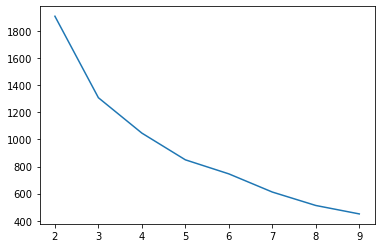

In [44]:
sns.lineplot(x=K, y = ssd)
plt.show()

In [45]:
ssd

[1910.702053812443,
 1308.6225418292433,
 1047.1306035281498,
 849.7840331525663,
 745.929038064573,
 611.668418794855,
 512.3774937919834,
 450.0606550699833]

In [46]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(x_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.863509801272657
For n_clusters=3, the silhouette score is 0.8005168430193793
For n_clusters=4, the silhouette score is 0.5092890985962626
For n_clusters=5, the silhouette score is 0.4713054826716266
For n_clusters=6, the silhouette score is 0.4766401254866739
For n_clusters=7, the silhouette score is 0.4730271168027439
For n_clusters=8, the silhouette score is 0.4629854642721788


In [47]:
from yellowbrick.cluster import KElbowVisualizer

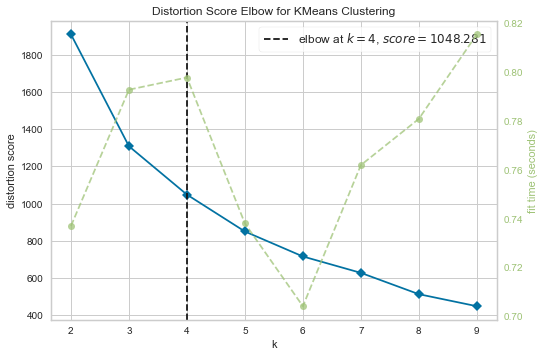

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x_scaled)
visu.poof()

In [49]:
model = KMeans(n_clusters=4)
model.fit(x_scaled)

KMeans(n_clusters=4)

In [51]:
dfa["cluster"] = model.labels_

In [52]:
dfa["cluster"].value_counts()

0    106
3     29
2      2
1      1
Name: cluster, dtype: int64

In [53]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(x_scaled, dfa.cluster)

0.49741187932751624

In [55]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.863509801272657
For n_clusters=3, the silhouette score is 0.8179627599217851
For n_clusters=4, the silhouette score is 0.48473341494906846
For n_clusters=5, the silhouette score is 0.5075047461769289
For n_clusters=6, the silhouette score is 0.5080494179809859
For n_clusters=7, the silhouette score is 0.4730271168027439
For n_clusters=8, the silhouette score is 0.4629854642721788


In [56]:
dfa

,Countries,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,cluster
0,Afghanistan,13444.0,2600.0,0.0,250.0,300.0,0.0,1870.0,0.0,0.0,10620.0,0.0,1760.0,500.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,430.0,0.0,55000.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,23137.0,190.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4670.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,40.0,160000.0,425000.0,1.683000e+08,1519438.0,3057220.0,0
2,Algeria,4659.0,5510.0,1030.0,220.0,590.0,870.0,2570.0,450.0,8800.0,73610.0,3200.0,2400.0,3160.0,2010.0,0.0,60.0,0.0,50.0,1.300000e+10,6.260000e+09,1570.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,3
3,Angola,8379.0,2950.0,720.0,180.0,300.0,470.0,1260.0,150.0,3790.0,5950.0,280.0,3570.0,1150.0,570.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,1760.0,1666000.0,823000.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,6521.0,2270.0,240.0,70.0,90.0,640.0,1000.0,0.0,3700.0,7390.0,830.0,1720.0,260.0,490.0,0.0,20.0,40.0,0.0,4.200000e+09,2.149000e+11,11380.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,6449.0,2600.0,380.0,0.0,520.0,820.0,860.0,100.0,3900.0,6000.0,730.0,1040.0,360.0,490.0,0.0,20.0,0.0,40.0,7.450000e+08,1.003000e+11,4440.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,3
134,Vietnam,3559.0,2930.0,770.0,0.0,380.0,360.0,1380.0,250.0,26150.0,25300.0,700.0,10000.0,850.0,650.0,0.0,60.0,0.0,90.0,5.500000e+09,9.658000e+10,450.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,3
135,Yemen,12412.0,1690.0,770.0,0.0,80.0,210.0,610.0,140.0,6200.0,6150.0,200.0,850.0,1500.0,300.0,0.0,0.0,0.0,0.0,1.400000e+09,7.068000e+09,570.0,122600.0,145000.0,3.000000e+09,11266221.0,28667230.0,0
136,Zambia,16464.0,1080.0,180.0,0.0,110.0,520.0,270.0,0.0,750.0,1840.0,0.0,420.0,500.0,0.0,0.0,0.0,0.0,0.0,4.000000e+07,1.166000e+10,880.0,0.0,210000.0,0.000000e+00,6166905.0,16445079.0,0


In [57]:
dfa[dfa["cluster"]==0].Countries

0      Afghanistan
1          Albania
3           Angola
4        Argentina
5          Armenia
          ...     
131        Uruguay
132     Uzbekistan
135          Yemen
136         Zambia
137       Zimbabwe
Name: Countries, Length: 106, dtype: object

In [58]:
dfa[dfa["cluster"]==1].Countries

130    United States
Name: Countries, dtype: object

In [59]:
dfa[dfa["cluster"]==2].Countries

26      China
101    Russia
Name: Countries, dtype: object

In [60]:
dfa[dfa["cluster"]==3].Countries

2                   Algeria
17                   Brazil
22                   Canada
27                 Colombia
35                    Egypt
40                   France
43                  Germany
45                   Greece
49                    India
50                Indonesia
51                     Iran
52                     Iraq
54                   Israel
55                    Italy
57                    Japan
73                   Mexico
87              North Korea
91                 Pakistan
102            Saudi Arabia
110             South Korea
118                   Syria
119                  Taiwan
122                Thailand
124                  Turkey
127                 Ukraine
128    United Arab Emirates
129          United Kingdom
133               Venezuela
134                 Vietnam
Name: Countries, dtype: object

In [61]:
dfa.groupby("cluster").mean()

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18001.783019,996.226415,186.509434,50.188679,91.981132,247.735849,413.396226,52.830189,2013.396226,7156.226415,485.188679,1420.283019,444.716981,299.433962,0.471698,7.169811,1.698113,12.735849,2.530398e+09,1.962519e+11,1085.283019,2.388276e+05,3.484226e+05,2.937898e+09,8.668142e+06,2.006176e+07
1,606.000000,132640.000000,20850.000000,7150.000000,9450.000000,26430.000000,57680.000000,9670.000000,62890.000000,392530.000000,14650.000000,27400.000000,13660.000000,4900.000000,200.000000,660.000000,910.000000,0.000000,7.500000e+11,1.791000e+13,135130.000000,9.352000e+06,2.000000e+07,3.652000e+10,1.448728e+08,3.292565e+08
2,686.000000,36865.000000,10525.000000,5565.000000,3240.000000,4055.000000,12165.000000,4060.000000,82250.000000,300190.000000,49415.000000,40325.000000,32550.000000,6900.000000,15.000000,680.000000,260.000000,310.000000,1.425000e+11,1.068800e+12,8625.000000,7.209000e+06,8.362500e+06,5.281000e+10,4.112478e+08,7.634059e+08
3,3642.103448,7728.275862,1754.827586,412.068966,553.103448,1845.172414,2992.413793,412.758621,15567.241379,57889.310345,4409.310345,9830.689655,3126.551724,1894.482759,5.517241,94.482759,25.862069,71.724138,2.165169e+10,1.063464e+12,4580.689655,1.432131e+06,1.484276e+06,4.119763e+10,5.603236e+07,1.157347e+08


In [62]:
dfa["military_power"] = dfa["cluster"].map({0:"weak",
                                          1:"very strong",
                                          2:"strong",
                                          3:"medium"})

In [63]:
dfa["military_power"]

0        weak
1        weak
2      medium
3        weak
4        weak
        ...  
133    medium
134    medium
135      weak
136      weak
137      weak
Name: military_power, Length: 138, dtype: object

In [64]:
dfa["Countries"]

0      Afghanistan
1          Albania
2          Algeria
3           Angola
4        Argentina
          ...     
133      Venezuela
134        Vietnam
135          Yemen
136         Zambia
137       Zimbabwe
Name: Countries, Length: 138, dtype: object

In [65]:
dfa[dfa["military_power"] == "weak"]

,Countries,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,cluster,military_power
0,Afghanistan,13444.0,2600.0,0.0,250.0,300.0,0.0,1870.0,0.0,0.0,10620.0,0.0,1760.0,500.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,430.0,0.0,55000.0,0.000000e+00,14325743.0,34940837.0,0,weak
1,Albania,23137.0,190.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4670.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,40.0,160000.0,425000.0,1.683000e+08,1519438.0,3057220.0,0,weak
3,Angola,8379.0,2950.0,720.0,180.0,300.0,470.0,1260.0,150.0,3790.0,5950.0,280.0,3570.0,1150.0,570.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,1760.0,1666000.0,823000.0,8.273000e+09,6244205.0,30355880.0,0,weak
4,Argentina,6521.0,2270.0,240.0,70.0,90.0,640.0,1000.0,0.0,3700.0,7390.0,830.0,1720.0,260.0,490.0,0.0,20.0,40.0,0.0,4.200000e+09,2.149000e+11,11380.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0,weak
5,Armenia,21251.0,640.0,0.0,90.0,30.0,130.0,370.0,200.0,1100.0,7480.0,380.0,1500.0,680.0,0.0,0.0,0.0,0.0,0.0,1.385000e+09,1.041000e+10,110.0,0.0,475000.0,0.000000e+00,1696085.0,3038217.0,0,weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Uruguay,18909.0,500.0,0.0,70.0,90.0,160.0,130.0,0.0,780.0,4630.0,0.0,0.0,40.0,200.0,0.0,0.0,0.0,10.0,4.950000e+09,2.837000e+10,1330.0,0.0,556000.0,0.000000e+00,1549878.0,3369299.0,0,weak
132,Uzbekistan,8086.0,1850.0,660.0,200.0,180.0,20.0,790.0,250.0,4200.0,12150.0,1370.0,0.0,980.0,0.0,0.0,0.0,0.0,0.0,9.750000e+08,1.690000e+10,530.0,460700.0,142000.0,5.940000e+08,15912566.0,30023709.0,0,weak
135,Yemen,12412.0,1690.0,770.0,0.0,80.0,210.0,610.0,140.0,6200.0,6150.0,200.0,850.0,1500.0,300.0,0.0,0.0,0.0,0.0,1.400000e+09,7.068000e+09,570.0,122600.0,145000.0,3.000000e+09,11266221.0,28667230.0,0,weak
136,Zambia,16464.0,1080.0,180.0,0.0,110.0,520.0,270.0,0.0,750.0,1840.0,0.0,420.0,500.0,0.0,0.0,0.0,0.0,0.0,4.000000e+07,1.166000e+10,880.0,0.0,210000.0,0.000000e+00,6166905.0,16445079.0,0,weak


In [66]:
dfa[dfa["military_power"] == "medium"]

,Countries,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,cluster,military_power
2,Algeria,4659.0,5510.0,1030.0,220.0,590.0,870.0,2570.0,450.0,8800.0,73610.0,3200.0,2400.0,3160.0,2010.0,0.0,60.0,0.0,50.0,1.300000e+10,6.260000e+09,1570.0,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,3,medium
17,Brazil,1988.0,7150.0,430.0,780.0,1260.0,1980.0,2420.0,120.0,4370.0,18200.0,1320.0,5650.0,840.0,1120.0,0.0,60.0,0.0,70.0,2.780000e+10,5.474000e+11,40930.0,2622000.0,3020000.0,1.300000e+10,107764996.0,2.088469e+08,3,medium
22,Canada,3712.0,3850.0,620.0,0.0,380.0,1350.0,1450.0,0.0,800.0,19730.0,0.0,1330.0,0.0,640.0,0.0,40.0,0.0,120.0,2.250000e+10,1.608000e+12,14670.0,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,3,medium
27,Colombia,6045.0,4690.0,210.0,380.0,760.0,800.0,2240.0,0.0,0.0,5950.0,60.0,1100.0,0.0,4530.0,0.0,110.0,0.0,40.0,1.060000e+10,1.246000e+11,8360.0,853600.0,300000.0,2.002000e+09,24084498.0,4.816900e+07,3,medium
35,Egypt,1872.0,10540.0,2150.0,880.0,590.0,3870.0,2940.0,810.0,42950.0,117000.0,11390.0,21890.0,10840.0,3160.0,20.0,80.0,0.0,70.0,1.120000e+10,7.747000e+10,830.0,589400.0,832000.0,4.400000e+09,42946553.0,9.941332e+07,3,medium
40,France,1702.0,12290.0,2690.0,0.0,1210.0,1870.0,5890.0,620.0,5280.0,60280.0,1090.0,120.0,130.0,1800.0,40.0,90.0,110.0,110.0,4.150000e+10,5.360000e+12,4640.0,151700.0,1600000.0,7.235000e+07,30111868.0,6.736436e+07,3,medium
43,Germany,2186.0,7120.0,1280.0,740.0,710.0,260.0,3860.0,560.0,2450.0,45830.0,1080.0,0.0,380.0,800.0,0.0,60.0,0.0,90.0,5.000000e+10,5.326000e+12,5390.0,434100.0,2500000.0,1.454000e+08,37010559.0,8.045774e+07,3,medium
45,Greece,5311.0,5660.0,1870.0,0.0,150.0,1430.0,2310.0,290.0,13550.0,36910.0,5470.0,4630.0,1520.0,1160.0,0.0,110.0,0.0,130.0,4.844000e+09,5.066000e+11,770.0,27530.0,350000.0,1.000000e+07,4993347.0,1.076152e+07,3,medium
49,India,953.0,21230.0,5380.0,1720.0,2500.0,3590.0,7220.0,230.0,42920.0,86860.0,2350.0,40600.0,2660.0,2850.0,10.0,160.0,100.0,130.0,6.100000e+10,5.016000e+11,3460.0,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,3,medium
50,Indonesia,2544.0,4620.0,410.0,390.0,540.0,1090.0,1770.0,160.0,3130.0,11780.0,1530.0,3660.0,360.0,2820.0,0.0,50.0,0.0,70.0,7.600000e+09,3.444000e+11,6730.0,801700.0,1630000.0,3.230000e+09,130868127.0,2.627874e+08,3,medium


In [67]:
dfa[dfa["military_power"] == "strong"]

,Countries,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,cluster,military_power
26,China,691.0,32100.0,12320.0,3710.0,2240.0,3140.0,9110.0,2810.0,35000.0,330000.0,38000.0,36000.0,26500.0,7770.0,20.0,740.0,360.0,520.0,2.370000e+11,1.598000e+12,5070.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,2,strong
101,Russia,681.0,41630.0,8730.0,7420.0,4240.0,4970.0,15220.0,5310.0,129500.0,270380.0,60830.0,44650.0,38600.0,6030.0,10.0,620.0,160.0,100.0,4.800000e+10,5.396000e+11,12180.0,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,2,strong


In [68]:
dfa[dfa["military_power"] == "very strong"]

,Countries,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,cluster,military_power
130,United States,606.0,132640.0,20850.0,7150.0,9450.0,26430.0,57680.0,9670.0,62890.0,392530.0,14650.0,27400.0,13660.0,4900.0,200.0,660.0,910.0,0.0,7.500000e+11,1.791000e+13,135130.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,1,very strong


In [69]:
output = pd.DataFrame({'Country': dfa.Countries, 'Military Power': dfa.military_power})
output.shape

(138, 2)

In [70]:
output

,Country,Military Power
0,Afghanistan,weak
1,Albania,weak
2,Algeria,medium
3,Angola,weak
4,Argentina,weak
...,...,...
133,Venezuela,medium
134,Vietnam,medium
135,Yemen,weak
136,Zambia,weak


In [71]:
output.to_csv("world_military_powers.csv",index = False)